# Phase Portrait Analysis

### Example: 

Consider the system of nonlinear differential equations:
$$
\dot{x} = x + e^{-y}
$$

$$
\dot{y} = -y
$$

1. Use **qualitative arguments** to obtain information about the phase portrait (i.e., find equilibrium points, nullclines, and classify the stability).

2. Using a computer (via Python code), plot the **vector field**.

3. Use the **Runge-Kutta method** to compute several trajectories and plot them on the phase plane.

### 1. Use qualitative arguments to obtain information about the phase portrait (i.e., find equilibrium points, nullclines, and classify the stability).

#### Equilibrium Point
Equilibrium points $(x^*, y^*)$ are found by setting both $\dot{x}=0$ and $\dot{y}=0$.

1. Set $\dot{y} = 0$:
   $$-y = 0 \quad \implies \quad y^* = 0$$

2. Set $\dot{x} = 0$ and substitute $y^*=0$:
   $$x + e^{-y} = 0$$
   $$x + e^0 = 0$$
   $$x + 1 = 0 \quad \implies \quad x^* = -1$$

The system has a single **Equilibrium Point** at **$(x^*,y^*)=(-1, 0)$**.

#### Nullclines:

1. $\dot{y}=0$ Nullcline (Horizontal Flow):
  $$-y = 0 \quad \implies \quad y = 0 \quad (\text{The } x\text{-axis})$$
  
2. $\dot{x}=0$ Nullcline (Vertical Flow):
  $$x + e^{-y} = 0 \quad \implies \quad x = -e^{-y}$$


#### Stability Analysis:

Note that $y(t) \to 0$ as $t \to \infty$, since the solution to $\dot{y} = -y$ is $y(t) = y_0 e^{-t}$. Hence $e^y \to 1$ and so in the long run, the equation for $x$ becomes $\dot{x} \approx x+1$.

This has exponentially growing solutions, which suggests that the fixed point is unstable. If we restrict our attention to initial conditions on the $x$-axis, then $y_0 = 0$ and so $y(t) = 0$ for all time. Hence the flow on the $x$-axis is governed strictly by $\dot{x} = x+1$. Therefore the fixed point is unstable.

### 2. Using a computer (via Python code), plot the direction field.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
# ODE system
def system(t, state):
    """
    pair -> [x, y]
    Returns -> [dx/dt, dy/dt]
    """
    x, y = state
    
    # Slopes
    dxdt = x + np.exp(-y)
    dydt = -y
    
    return [dxdt, dydt]

In [12]:
# Set limits
x_min, x_max = -5., 5.
y_min, y_max = -5., 5.

# Generate axes
x_1d = np.linspace(x_min, x_max, 20)
y_1d = np.linspace(y_min, y_max, 20)

# Create meshgrid
x_2d, y_2d = np.meshgrid(x_1d, y_1d)

# Compute the vector components at each grid point
u_2d = x_2d + np.exp(-y_2d)  # dx/dt
v_2d = -y_2d                 # dy/dt

# Normalise the vectors for plotting
mag = np.sqrt(u_2d**2 + v_2d**2)
u_2d = u_2d / mag
v_2d = v_2d / mag

In [15]:
# Define nullclines
# y-nullcline (y = 0)
y_null = 0

# x-nullcline (x = -e^{-y})
x_null = -np.exp(-y_1d)

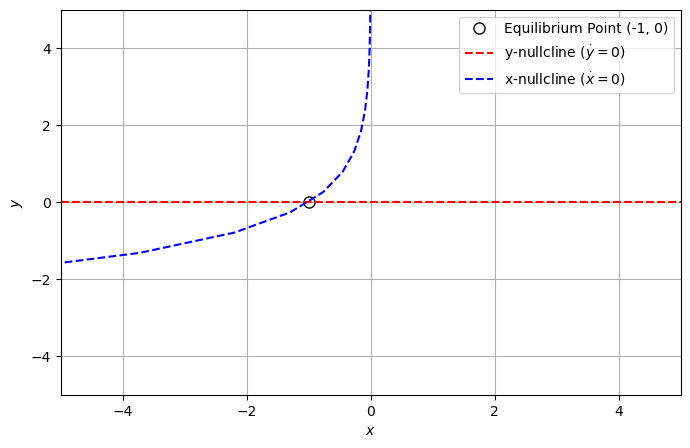

In [17]:
plt.figure(figsize=(8, 5))

# Plot the equilibrium point
plt.plot(-1, 0, 'ko', markersize=8, label='Equilibrium Point (-1, 0)', fillstyle='none')

# Plot the nullclines
plt.axhline(y_null, color='red', linestyle='--', label='y-nullcline ($\dot{y}=0$)')
plt.plot(x_null, y_1d, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()

plt.grid(True)

plt.show()

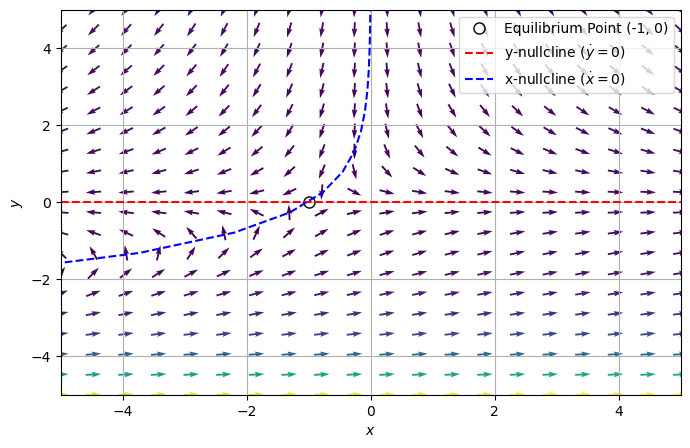

In [18]:
plt.figure(figsize=(8, 5))

# Plot the equilibrium point
plt.plot(-1, 0, 'ko', markersize=8, label='Equilibrium Point (-1, 0)', fillstyle='none')

# Plot the nullclines
plt.axhline(y_null, color='red', linestyle='--', label='y-nullcline ($\dot{y}=0$)')
plt.plot(x_null, y_1d, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')

# Plot the direction field
plt.quiver(x_2d, y_2d, u_2d, v_2d, mag, cmap='viridis', scale=40, pivot='mid', linewidth=0.5)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()

plt.grid(True)

plt.show()

### 3. Use the Runge-Kutta method to compute several trajectories and plot them on the phase plane.

In [22]:
# Time axis
t_lims = [0., 10.]
t_axis = np.linspace(t_lims[0], t_lims[1], 200)

# A list of ICs [x0, y0]
initial_conditions = [
    [-3., -3.],  # Bottom left
    [1., 3.],    # Top right
    [-2., 0.],   # Along x
]

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/scipy/integrate/_ivp/rk.py:63: RuntimeWarning: overflow encountered in dot
  dy = np.dot(K[:s].T, a[:s]) * h
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85678/1750960444.py:10: RuntimeWarning: overflow encountered in exp
  dxdt = x + np.exp(-y)
/opt/anaconda3/envs/py311/lib/python3.11/site-packages/scipy/integrate/_ivp/rk.py:63: RuntimeWarning: invalid value encountered in dot
  dy = np.dot(K[:s].T, a[:s]) * h
/opt/anaconda3/envs/py311/lib/python3.11/site-packages/scipy/integrate/_ivp/rk.py:66: RuntimeWarning: invalid value encountered in dot
  y_new = y + h * np.dot(K[:-1].T, B)
/opt/anaconda3/envs/py311/lib/python3.11/site-packages/scipy/integrate/_ivp/rk.py:106: RuntimeWarning: invalid value encountered in dot
  return np.dot(K.T, self.E) * h


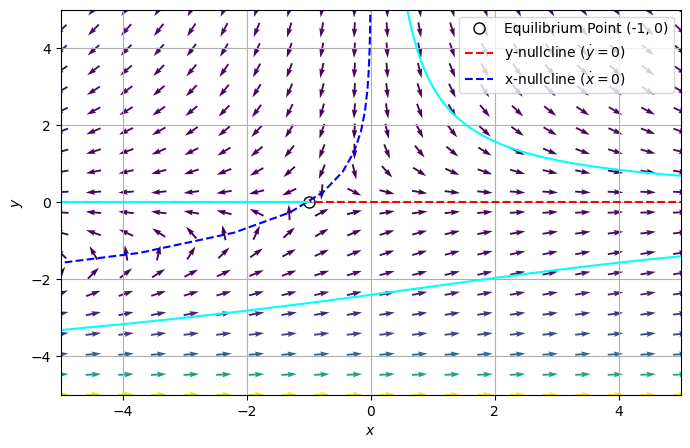

In [25]:
plt.figure(figsize=(8, 5))

# Plot the equilibrium point
plt.plot(-1, 0, 'ko', markersize=8, label='Equilibrium Point (-1, 0)', fillstyle='none')

# Plot the nullclines
plt.axhline(y_null, color='red', linestyle='--', label='y-nullcline ($\dot{y}=0$)')
plt.plot(x_null, y_1d, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')

# Plot the direction field
plt.quiver(x_2d, y_2d, u_2d, v_2d, mag, cmap='viridis', scale=40, pivot='mid', linewidth=0.5)

# Integrate and plot trajectories
for x0, y0 in initial_conditions:
    # Integrate and plot trajectories
    sol = solve_ivp(system, t_lims, [x0, y0], t_eval=t_axis, method='RK45')
    plt.plot(sol.y[0], sol.y[1], color='cyan')

    # Integrate and plot reverse-time trajectories
    sol_r = solve_ivp(system, [0., -10.], [x0, y0], t_eval=np.linspace(0., -10., 200), method='RK45')
    plt.plot(sol_r.y[0], sol_r.y[1], color='cyan')
    
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()

plt.grid(True)

plt.show()
